<a href="https://colab.research.google.com/github/Tiwari666/NLP/blob/main/Sentiment_Analysis_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlopen, Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Search by the name in serch space. e.g., amzn. It will open a new web with ticker (t) = amzn
# take the website from the begining only upto the ticker name: AMZN.
finviz_url = 'https://finviz.com/quote.ashx?t='
finviz_url

'https://finviz.com/quote.ashx?t='

In [ ]:
# Search by the name in the search space. e.g., amzn. It will open a new web with ticker (t) = amzn
# take/copy the website from the begining (http) and keep copying only upto the ticker name: AMZN.
finviz_url = 'https://finviz.com/quote.ashx?t='

# Find the index of the ticker name in the URL
ticker_index = finviz_url.find('=') + 1

# Extract the base URL up to the ticker name
base_url = finviz_url[:ticker_index]

print(base_url)

https://finviz.com/quote.ashx?t=


In [ ]:
# List OF COMMON TICKERS to be included in this analysis
tickers = ['AMZN', 'AMD', 'GOOG']

In [ ]:
#Iterating over each tickers and creates the finviz url to get the HTML data
for ticker in tickers:
    url = finviz_url + ticker
    print(url)

https://finviz.com/quote.ashx?t=AMZN
https://finviz.com/quote.ashx?t=AMD
https://finviz.com/quote.ashx?t=GOOG


# **Parsing and testing the HTML code from the URL:**

In [ ]:
# Define the URL
url = 'https://finviz.com/quote.ashx?t='

# Create a request object with a custom User-Agent header
req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})

try:
    # Open the URL and read the HTML content
    response = urlopen(req)
    html_content = response.read()

    # Print the HTML content
    print(html_content.decode('utf-8'))  # Decoding bytes to string assuming UTF-8 encoding
except HTTPError as e:
    print("Error:", e)

<!DOCTYPE html>
<html lang="en" class=" dark">
<head>
<title>FINVIZ.com - Stock Screener</title>
<meta charset="UTF-8"><meta name="viewport" content="width=1024"><meta name="description" content="Stock screener for investors and traders, financial visualizations.">
<meta http-equiv="Refresh" content="3600">

            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-700.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-900.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/inter-latin.woff2" as="font" crossorigin>
        
            <script>
                window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
                 

# **Creating dictionary with the ticker symbol:**
This updated code will iterate over each ticker in the tickers list, fetch the HTML content for the corresponding Finviz page, extract the news table, and store it in the news_tables dictionary with the ticker symbol as the key.

The following dictionary just hold the result from the URL in the dictionary form.

In [ ]:
# Create an empty dictionary to store news tables for each ticker
news_tables = {}

# Iterate over each ticker
for ticker in tickers:
    # Construct the URL for the current ticker
    url = base_url + ticker

    # Create a request object with a custom User-Agent header
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})

    try:
        # Open the URL and read the HTML content
        response = urlopen(req)
        html_content = response.read()

        # Parse the HTML content using BeautifulSoup
        html = BeautifulSoup(html_content, 'html.parser')

        # Find the news table with id 'news-table'
        news_table = html.find(id='news-table')

        # Store the news table in the dictionary with the ticker symbol as the key
        news_tables[ticker] = news_table

    except HTTPError as e:
        print("Error:", e)

# Print the news tables (for demonstration)
for ticker, news_table in news_tables.items():
    print(f"Ticker: {ticker}")
    print(news_table)
    print()


Ticker: AMZN
<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Yahoo Finance Video', 'https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html');">
<td align="right" width="130">
            Today 10:39AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html" rel="nofollow" target="_blank">JPMorgan names Amazon 'best idea' in 2024</a>
</div>
<div class="news-link-right">
<span>(Yahoo Finance Video)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/bf163e1b-0a64-3ca7-8aee-2031763b4979/amazon-stock-is-hitting.html');">
<td align="right" width="130">
            10:00AM
        </td>
<td al

# **Scrapeing the news tables for the specified tickers from the Finviz website and printing out the HTML content of those tables**

In [ ]:
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

# Define the base URL
base_url = 'https://finviz.com/quote.ashx?t='

# Define the list of tickers
tickers = ['AMZN',  'AMD', 'GOOG']

# Create an empty dictionary to store news tables for each ticker
news_tables = {}

# Iterate over each ticker
for ticker in tickers:
    # Construct the URL for the current ticker
    url = base_url + ticker

    # Create a request object with a custom User-Agent header
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})

    try:
        # Open the URL and read the HTML content
        response = urlopen(req)

        # Parse the HTML content using BeautifulSoup
        html = BeautifulSoup(response, features='html.parser')

        # Find the news table with id 'news-table'
        news_table = html.find(id='news-table')

        # Store the news table in the dictionary with the ticker symbol as the key
        news_tables[ticker] = news_table.prettify()

    except HTTPError as e:
        print("Error:", e)

# Print the news tables stored in the dictionary
for ticker, news_table_html in news_tables.items():
    print(f"Ticker: {ticker}")
    print(news_table_html)
    print()

Ticker: AMZN
<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Yahoo Finance Video', 'https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html');">
  <td align="right" width="130">
   Today 10:39AM
  </td>
  <td align="left">
   <div class="news-link-container">
    <div class="news-link-left">
     <a class="tab-link-news" href="https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html" rel="nofollow" target="_blank">
      JPMorgan names Amazon 'best idea' in 2024
     </a>
    </div>
    <div class="news-link-right">
     <span>
      (Yahoo Finance Video)
     </span>
    </div>
   </div>
  </td>
 </tr>
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/bf163e1b-0a64-3ca7-8aee-2031763b4979/amazon-stock-is-hitting.html');">
  <td align="ri

# **Parsing the heading from each table rows(tr):**

In [ ]:
# Accessing the HTML content of the news table for "AMZN"
amzn_data = news_tables['AMZN']

# Printing the HTML content for demonstration
print(amzn_data)

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Yahoo Finance Video', 'https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html');">
  <td align="right" width="130">
   Today 10:39AM
  </td>
  <td align="left">
   <div class="news-link-container">
    <div class="news-link-left">
     <a class="tab-link-news" href="https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html" rel="nofollow" target="_blank">
      JPMorgan names Amazon 'best idea' in 2024
     </a>
    </div>
    <div class="news-link-right">
     <span>
      (Yahoo Finance Video)
     </span>
    </div>
   </div>
  </td>
 </tr>
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/bf163e1b-0a64-3ca7-8aee-2031763b4979/amazon-stock-is-hitting.html');">
  <td align="right" width="1

# **Parseing HTML content using BeautifulSoup and printing out all the <tr> elements found in the HTML**

In [ ]:
# Using amzn_data in the HTML content in string format
# Create a BeautifulSoup object
soup = BeautifulSoup(amzn_data, 'html.parser')

# Now  finding all <tr> elements
amzn_rows = soup.find_all('tr')

# Printing the found rows
print(amzn_rows)

[<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Yahoo Finance Video', 'https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html');">
<td align="right" width="130">
   Today 10:39AM
  </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/video/jpmorgan-names-amazon-best-idea-143908679.html" rel="nofollow" target="_blank">
      JPMorgan names Amazon 'best idea' in 2024
     </a>
</div>
<div class="news-link-right">
<span>
      (Yahoo Finance Video)
     </span>
</div>
</div>
</td>
</tr>, <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/bf163e1b-0a64-3ca7-8aee-2031763b4979/amazon-stock-is-hitting.html');">
<td align="right" width="130">
   10:00AM
  </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.co

# **Gathering news data for the specified tickers from Finviz and organizing it into a structured format for further analysis**

In [ ]:
import requests
from bs4 import BeautifulSoup

# List OF COMMON TICKERS to be included in this analysis
tickers = ['AMZN', 'AMD', 'GOOG']

# Define the base URL for Finviz
finviz_url = 'https://finviz.com/quote.ashx?t='

# Initialize parsed_data list
parsed_data = []

# Iterate over each ticker
for ticker in tickers:
    # Construct the URL for the specific ticker
    url = finviz_url + ticker

    try:
        # Send a GET request to the URL with a custom User-Agent header
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Find the news table for the ticker
            news_table = soup.find(id='news-table')

            # Ensure news_table is not None
            if news_table is not None:
                # Iterate through rows in the news_table
                for row in news_table.findAll('tr'):
                    # Extract data from the row if it contains a link ('a' tag)
                    if row.a:
                        title = row.a.text
                        date_data = row.td.text.split(' ')

                        if len(date_data) == 1:
                            time = date_data[0]
                        else:
                            date = date_data[0]
                            time = date_data[1]

                        # Combine date and time to form the timestamp
                        timestamp = f"{date} {time}"

                        # Append parsed data to parsed_data list
                        parsed_data.append([ticker, timestamp, title])
        else:
            print(f"Failed to fetch data for {ticker}. Status code: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")

# Now parsed_data contains the extracted structured data with ticker, timestamp, and title
print(parsed_data)



[['AMZN', '\r\n ', "JPMorgan names Amazon 'best idea' in 2024"], ['AMZN', '\r\n ', 'Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?'], ['AMZN', '\r\n ', '2 Catalysts That Could Drive Amazon Stock Even Higher'], ['AMZN', '\r\n ', 'The top companies for training workers to use AI   including Amazon and GM'], ['AMZN', '\r\n ', "What's Going on With Amazon Stock?"], ['AMZN', '\r\n ', '1 Stock That Turned $1,000 Into Nearly $2 Million'], ['AMZN', '\r\n ', '5 Ways to Save Big on Your Next Target Run'], ['AMZN', '\r\n ', 'Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate'], ['AMZN', '\r\n ', 'When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.'], ['AMZN', '\r\n ', '13 Best Machine Learning Stocks To Invest In'], ['AMZN', '\r\n ', 'Amazon (AMZN) Registers a Bigger Fall Than the Market: Important Facts to Note'], ['AMZN', '\r\n ', 'Hedge Fund and Insider Trading News: Jeffrey Talpins, Dan Loeb, Ken Grif

# **Getting Texts:**

In [ ]:
# Iterate over the rows in amzn_rows and print the titles
for index, row in enumerate(amzn_rows):
    # Check if the <a> tag exists in the row
    if row.a:
        title = row.a.text
        print(title)
    else:
        print("No title found for this row.")



      JPMorgan names Amazon 'best idea' in 2024
     

      Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?
     

      2 Catalysts That Could Drive Amazon Stock Even Higher
     

      The top companies for training workers to use AI   including Amazon and GM
     

      What's Going on With Amazon Stock?
     
No title found for this row.

      1 Stock That Turned $1,000 Into Nearly $2 Million
     

      5 Ways to Save Big on Your Next Target Run
     

      Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate
     

      When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.
     

      13 Best Machine Learning Stocks To Invest In
     

      Amazon (AMZN) Registers a Bigger Fall Than the Market: Important Facts to Note
     

      Hedge Fund and Insider Trading News: Jeffrey Talpins, Dan Loeb, Ken Griffin, Soroban Capital Partners, Millennium Management, MasterCraft Boat Holdings, In

# **Getting the timestamp**

In [ ]:
# Iterate over the rows in amzn_rows and print the titles and timestamps
for index, row in enumerate(amzn_rows):
    # Check if the <a> tag exists in the row for the title
    if row.a:
        title = row.a.text
    else:
        title = "No title found"

    # Check if the <td> tag exists in the row for the timestamp
    if row.td:
        timestamp = row.td.text
    else:
        timestamp = "No timestamp found"

    # Print the timestamp and title
    print(timestamp + " " + title)



   Today 10:39AM
   
      JPMorgan names Amazon 'best idea' in 2024
     

   10:00AM
   
      Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?
     

   10:00AM
   
      2 Catalysts That Could Drive Amazon Stock Even Higher
     

   09:30AM
   
      The top companies for training workers to use AI   including Amazon and GM
     

   08:00AM
   
      What's Going on With Amazon Stock?
     

   06:15AM
   No title found

   06:15AM
   
      1 Stock That Turned $1,000 Into Nearly $2 Million
     

   05:30AM
   
      5 Ways to Save Big on Your Next Target Run
     

   05:30AM
   
      Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate
     

   05:21AM
   
      When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.
     

   Apr-15-24 09:03PM
   
      13 Best Machine Learning Stocks To Invest In
     

   05:45PM
   
      Amazon (AMZN) Registers a Bigger Fall Than the Market: Important 

# **Printing the timestamp and title in a single line, separated by a hyphen -**

In [ ]:
# Iterate over the rows in amzn_rows and print the timestamp and text in a single line
for index, row in enumerate(amzn_rows):
    # Check if the <a> tag exists in the row for the title
    if row.a:
        title = row.a.text
    else:
        title = "No title found"

    # Check if the <td> tag exists in the row for the timestamp
    if row.td:
        timestamp = row.td.text
    else:
        timestamp = "No timestamp found"

    # Print the timestamp and title in a single line
    print(f"{timestamp} - {title}")


   Today 10:39AM
   - 
      JPMorgan names Amazon 'best idea' in 2024
     

   10:00AM
   - 
      Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?
     

   10:00AM
   - 
      2 Catalysts That Could Drive Amazon Stock Even Higher
     

   09:30AM
   - 
      The top companies for training workers to use AI   including Amazon and GM
     

   08:00AM
   - 
      What's Going on With Amazon Stock?
     

   06:15AM
   - No title found

   06:15AM
   - 
      1 Stock That Turned $1,000 Into Nearly $2 Million
     

   05:30AM
   - 
      5 Ways to Save Big on Your Next Target Run
     

   05:30AM
   - 
      Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate
     

   05:21AM
   - 
      When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.
     

   Apr-15-24 09:03PM
   - 
      13 Best Machine Learning Stocks To Invest In
     

   05:45PM
   - 
      Amazon (AMZN) Registers a Bigger Fall Tha

# **Parsing the HTML content of each news table, extract the title, date, and time from each row, and append the data to the parsed_data list**

In [ ]:
parsed_data = []

# Iterate over each ticker and its corresponding news table
for ticker, news_table_html in news_tables.items():
    # Parse the HTML content of the news table
    news_table_soup = BeautifulSoup(news_table_html, 'html.parser')

    # Find all rows in the news table
    news_rows = news_table_soup.find_all('tr')

    # Iterate over each row in the news table
    for row in news_rows:
        # Extract title
        title = row.a.get_text() if row.a else "No title found"

        # Extract date and time
        date_time_data = row.td.text.split(' ')
        if len(date_time_data) == 1:
            time = date_time_data[0]
            date = "No date found"
        else:
            date = date_time_data[0]
            time = date_time_data[1]

        # Append the data to parsed_data
        parsed_data.append([ticker, date, time, title])

print(parsed_data)


[['AMZN', '\n', '', "\n      JPMorgan names Amazon 'best idea' in 2024\n     "], ['AMZN', '\n', '', '\n      Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?\n     '], ['AMZN', '\n', '', '\n      2 Catalysts That Could Drive Amazon Stock Even Higher\n     '], ['AMZN', '\n', '', '\n      The top companies for training workers to use AI   including Amazon and GM\n     '], ['AMZN', '\n', '', "\n      What's Going on With Amazon Stock?\n     "], ['AMZN', '\n', '', 'No title found'], ['AMZN', '\n', '', '\n      1 Stock That Turned $1,000 Into Nearly $2 Million\n     '], ['AMZN', '\n', '', '\n      5 Ways to Save Big on Your Next Target Run\n     '], ['AMZN', '\n', '', '\n      Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate\n     '], ['AMZN', '\n', '', '\n      When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.\n     '], ['AMZN', '\n', '', '\n      13 Best Machine Learning Stocks To Invest In\n   

# **Parseing HTML content containing news tables for each ticker, extracting relevant information (title, date, time, ticker), and printing the parsed**

In [ ]:
from datetime import datetime, timedelta

In [ ]:
parsed_data = []

# Initialize the date to today's date
current_date = datetime.now()

# Iterate over each ticker and its corresponding news table
for ticker, news_table_html in news_tables.items():
    # Convert the news_table HTML string into a BeautifulSoup object
    news_table_soup = BeautifulSoup(news_table_html, 'html.parser')

    # Find all <tr> elements within the news table
    for row in news_table_soup.find_all('tr', class_='cursor-pointer has-label'):
        # Extracting title
        title = row.a.get_text().strip() if row.a else "No title found"

        # Extracting time
        time = row.find_all('td')[0].get_text().strip()

        # Set the date for the current news item
        date = current_date.strftime("%b-%d-%y")

        # Append the data to parsed_data
        parsed_data.append([ticker.strip(), date, time, title])

        # Decrement the date by one day for the next news item
        current_date -= timedelta(days=1)

# Print the parsed data
for data in parsed_data:
    print(data)


['AMZN', 'Apr-16-24', 'Today 10:39AM', "JPMorgan names Amazon 'best idea' in 2024"]
['AMZN', 'Apr-15-24', '10:00AM', 'Amazon Stock Is Hitting Records. Is It Too Late to Buy Amazon Stock?']
['AMZN', 'Apr-14-24', '10:00AM', '2 Catalysts That Could Drive Amazon Stock Even Higher']
['AMZN', 'Apr-13-24', '09:30AM', 'The top companies for training workers to use AI   including Amazon and GM']
['AMZN', 'Apr-12-24', '08:00AM', "What's Going on With Amazon Stock?"]
['AMZN', 'Apr-11-24', '06:15AM', '1 Stock That Turned $1,000 Into Nearly $2 Million']
['AMZN', 'Apr-10-24', '05:30AM', '5 Ways to Save Big on Your Next Target Run']
['AMZN', 'Apr-09-24', '05:30AM', 'Big Tech Is Downsizing Workspace in Another Blow to Office Real Estate']
['AMZN', 'Apr-08-24', '05:21AM', 'When Will the Dow Jones Industrial Average Reach 50,000? History Suggests a Lot Sooner Than You Think.']
['AMZN', 'Apr-07-24', 'Apr-15-24 09:03PM', '13 Best Machine Learning Stocks To Invest In']
['AMZN', 'Apr-06-24', '05:45PM', 'Ama

# **Converting the structured news data into a pandas DataFrame FOR making it easier to manipulate and analyze the data using pandas' powerful functionalities**

In [ ]:
import pandas as pd

# Create a DataFrame from parsed_data
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

# Print the DataFrame
df.head(100)

,ticker,date,time,title
0,AMZN,Apr-16-24,Today 10:39AM,JPMorgan names Amazon 'best idea' in 2024
1,AMZN,Apr-15-24,10:00AM,Amazon Stock Is Hitting Records. Is It Too Lat...
2,AMZN,Apr-14-24,10:00AM,2 Catalysts That Could Drive Amazon Stock Even...
3,AMZN,Apr-13-24,09:30AM,The top companies for training workers to use ...
4,AMZN,Apr-12-24,08:00AM,What's Going on With Amazon Stock?
...,...,...,...,...
95,AMZN,Jan-12-24,10:41AM,Amazon CEO Andy Jassy: People are still buying...
96,AMZN,Jan-11-24,10:41AM,Amazon CEO Andy Jassy: AI is going to transfor...
97,AMZN,Jan-10-24,10:41AM,Amazon CEO Andy Jassy says the generative AI r...
98,AMZN,Jan-09-24,10:41AM,Amazon CEO Andy Jassy on inflation


In [ ]:
print(len(df))

300


# **Utilizing the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from NLTK to assess the sentiment of news article titles**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment based on title
def get_sentiment(title):
    # Perform sentiment analysis on the title
    sentiment_score = sid.polarity_scores(title)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column 'sentiment' in the DataFrame
df['sentiment'] = df['title'].apply(get_sentiment)

# Print the updated DataFrame
df.head(100)


,ticker,date,time,title,sentiment
0,AMZN,Apr-16-24,Today 10:39AM,JPMorgan names Amazon 'best idea' in 2024,Positive
1,AMZN,Apr-15-24,10:00AM,Amazon Stock Is Hitting Records. Is It Too Lat...,Positive
2,AMZN,Apr-14-24,10:00AM,2 Catalysts That Could Drive Amazon Stock Even...,Positive
3,AMZN,Apr-13-24,09:30AM,The top companies for training workers to use ...,Positive
4,AMZN,Apr-12-24,08:00AM,What's Going on With Amazon Stock?,Positive
...,...,...,...,...,...
95,AMZN,Jan-12-24,10:41AM,Amazon CEO Andy Jassy: People are still buying...,Positive
96,AMZN,Jan-11-24,10:41AM,Amazon CEO Andy Jassy: AI is going to transfor...,Positive
97,AMZN,Jan-10-24,10:41AM,Amazon CEO Andy Jassy says the generative AI r...,Positive
98,AMZN,Jan-09-24,10:41AM,Amazon CEO Andy Jassy on inflation,Positive


In [ ]:
df.columns

Index(['ticker', 'date', 'time', 'title', 'sentiment'], dtype='object')

# **1) Sentiment Analysis Trends Over Time:**

Analyze how sentiment varies over time for each ticker symbol. This could involve aggregating sentiment scores by date and plotting trends over time to identify periods of positive or negative sentiment.

In [ ]:
# Check for missing values in the sentiment_trends DataFrame
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Missing Values:\n", missing_values)

Missing Values:
 ticker       0
date         0
time         0
title        0
sentiment    0
dtype: int64


In [ ]:
len(df)

309

In [ ]:
# Print the column names of the DataFrame
print(df.columns)

Index(['ticker', 'date', 'time', 'title', 'sentiment'], dtype='object')


In [ ]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
df.head()

,ticker,date,time,title,sentiment
0,AMZN,Apr-16-24,Today 10:39AM,JPMorgan names Amazon 'best idea' in 2024,1
1,AMZN,Apr-15-24,10:00AM,Amazon Stock Is Hitting Records. Is It Too Lat...,1
2,AMZN,Apr-14-24,10:00AM,2 Catalysts That Could Drive Amazon Stock Even...,1
3,AMZN,Apr-13-24,09:30AM,The top companies for training workers to use ...,1
4,AMZN,Apr-12-24,08:00AM,What's Going on With Amazon Stock?,1


<ipython-input-54-24d738270262>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')


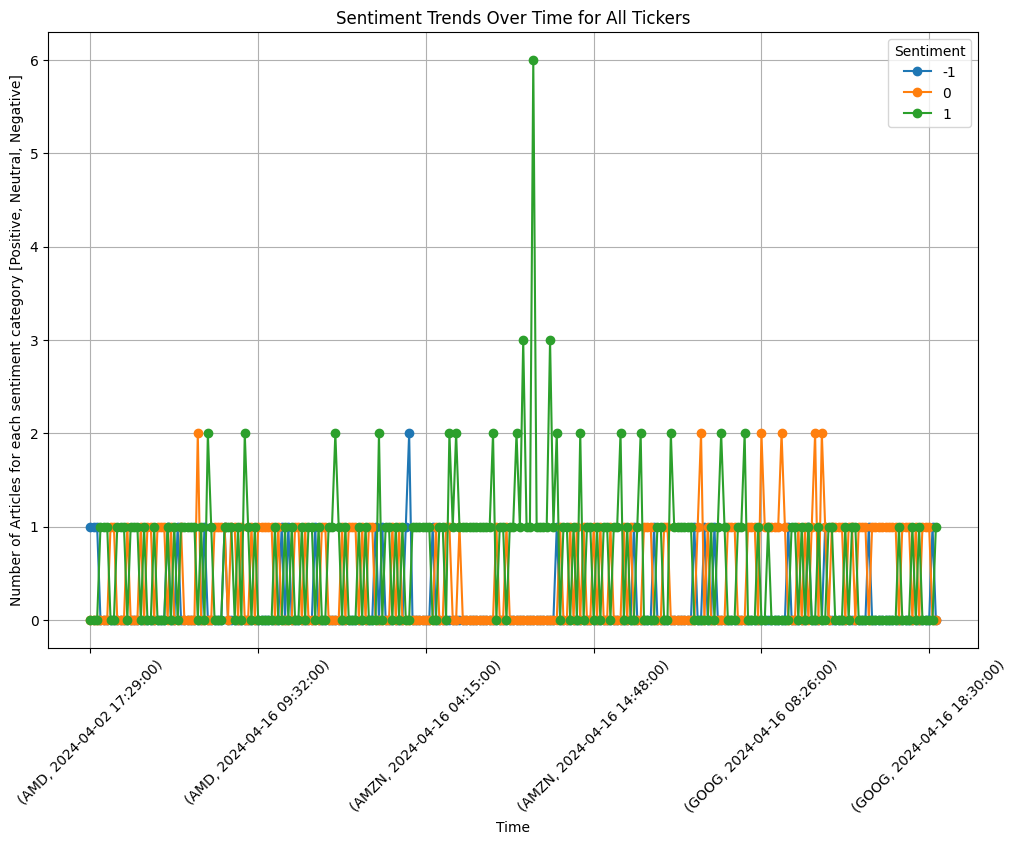

In [ ]:
# Replace 'Today' with today's date
df['time'] = df['time'].replace('Today', pd.to_datetime('today').strftime('%Y-%m-%d'))

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Group by ticker, time, and sentiment, count occurrences, and unstack to pivot the table
sentiment_trends = df.groupby(['ticker', 'time', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends over time for all tickers together with increased size
ax = sentiment_trends.plot(kind='line', marker='o', figsize=(12, 8))  # Adjust figsize as needed
plt.title('Sentiment Trends Over Time for All Tickers')
plt.xlabel('Time')
plt.ylabel('Number of Articles for each sentiment category [Positive, Neutral, Negative]')
plt.legend(title='Sentiment')
plt.grid(True)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

# **2) Machine learning models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
df.columns

Index(['ticker', 'date', 'time', 'title', 'sentiment'], dtype='object')

In [ ]:
# Preprocessing
# Drop any rows with missing values
df.dropna(inplace=True)

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Initialize models
log_reg_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear')

In [ ]:
# Train models
log_reg_model.fit(X_train_vec, y_train)
rf_model.fit(X_train_vec, y_train)
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
# Predict sentiment on the testing set
y_pred_log_reg = log_reg_model.predict(X_test_vec)
y_pred_rf = rf_model.predict(X_test_vec)
y_pred_svm = svm_model.predict(X_test_vec)

In [ ]:
# Evaluate models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
report_log_reg = classification_report(y_test, y_pred_log_reg, zero_division=1)
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
report_svm = classification_report(y_test, y_pred_svm, zero_division=1)

In [ ]:
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)
report_svm = classification_report(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_svm],
    'Precision': [
        precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=1),
        precision_score(y_test, y_pred_rf, average='weighted', zero_division=1),
        precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log_reg, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log_reg, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ]
}

In [ ]:
# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Print table
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.633333   0.670269  0.633333  0.590379
1        Random Forest  0.666667   0.696466  0.666667  0.614391
2                  SVM  0.683333   0.725000  0.683333  0.643347


# ***3) Topic Modeling:***

Use topic modeling techniques such as Latent Dirichlet Allocation (LDA) to identify the main topics or themes present in the news articles. This can help us understand the underlying topics driving sentiment and investor sentiment towards specific stocks.


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pandas as pd

In [ ]:
# Step 1: Data Preprocessing
data = df['title'].values.tolist()

In [ ]:
# Tokenize and preprocess the text data
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:  # Remove stopwords and short tokens
            result.append(token)
    return result

processed_data = [preprocess(text) for text in data]

In [ ]:
# Step 2: Create a Document-Term Matrix
# Create a dictionary mapping of words to their IDs
dictionary = corpora.Dictionary(processed_data)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_data]

In [1]:
# Step 3: Train the LDA Model
# Set the number of topics
num_topics = 5  # we can adjust this number based on the expected number of topics in your data

# Train the LDA model
lda_model = LdaModel(corpus=doc_term_matrix,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=42,
                     passes=10)

NameError: name 'LdaModel' is not defined

In [ ]:
# Step 4: Interpret Topics
# Print the topics and associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.067*"stock" + 0.020*"amazon" + 0.014*"intelligence" + 0.014*"artificial" + 0.013*"google"')
(1, '0.057*"stock" + 0.045*"amazon" + 0.030*"nvidia" + 0.024*"artificial" + 0.024*"intelligence"')
(2, '0.030*"stocks" + 0.028*"amazon" + 0.024*"news" + 0.018*"google" + 0.016*"tech"')
(3, '0.059*"earnings" + 0.054*"transcript" + 0.031*"nasdaq" + 0.023*"nyse" + 0.017*"amazon"')
(4, '0.041*"stocks" + 0.027*"best" + 0.023*"micro" + 0.023*"chips" + 0.019*"advanced"')


# **Interpretation:**

Each line (0,1,2,3,4) represents a topic identified by theLatent Dirichlet Allocation (LDA) model.

Within each line, the numbers represent the weights or probabilities of different words occurring in that topic.
For example, in topic 0, the words "stock", "amazon", "intelligence", "artificial", and "google" have probabilities of 0.067, 0.020, 0.014, 0.014, and 0.013 respectively.

These probabilities indicate how likely each word is to occur in the topic. Higher probabilities suggest that the word is more closely associated with that topic.

Overall, these numbers provide insights into the distribution of words across different topics identified by the LDA model.

In [ ]:
# Optional: Assign the dominant topic to each document
def assign_topic(lda_model, doc_term_matrix):
    topic_results = []
    for doc in doc_term_matrix:
        topics = lda_model.get_document_topics(doc)
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        topic_results.append(dominant_topic)
    return topic_results

df['dominant_topic'] = assign_topic(lda_model, doc_term_matrix)
df.head(100)

,ticker,date,time,title,sentiment,dominant_topic
1,AMZN,Apr-15-24,2024-04-16 10:00:00,Amazon Stock Is Hitting Records. Is It Too Lat...,2,0
2,AMZN,Apr-14-24,2024-04-16 10:00:00,2 Catalysts That Could Drive Amazon Stock Even...,2,0
3,AMZN,Apr-13-24,2024-04-16 09:30:00,The top companies for training workers to use ...,2,3
4,AMZN,Apr-12-24,2024-04-16 08:00:00,What's Going on With Amazon Stock?,2,1
5,AMZN,Apr-11-24,2024-04-16 06:15:00,"1 Stock That Turned $1,000 Into Nearly $2 Million",1,1
...,...,...,...,...,...,...
96,AMZN,Jan-11-24,2024-04-16 10:41:00,Amazon CEO Andy Jassy: AI is going to transfor...,2,1
97,AMZN,Jan-10-24,2024-04-16 10:41:00,Amazon CEO Andy Jassy says the generative AI r...,2,1
98,AMZN,Jan-09-24,2024-04-16 10:41:00,Amazon CEO Andy Jassy on inflation,2,1
99,AMZN,Jan-08-24,2024-04-16 10:22:00,Amazon CEO Andy Jassy says the benefits of AI ...,2,1


# **Interpretation  of dominant topic:**

The "dominant_topic" column in the dataset indicates the topic that is most dominant or prevalent in each article's content. Each article is assigned a topic number based on the topic modeling algorithm's output (e.g., LDA).

Interpretation the "dominant_topic" column:

0: This indicates that the dominant topic of the article is likely related to technology companies, particularly those involved in artificial intelligence, with mentions of stocks and major players like Amazon and Google.

1: Articles with this dominant topic are likely focused on technology and investments, with specific mentions of companies like Amazon and Nvidia, alongside discussions about artificial intelligence.

2: This dominant topic suggests that the article is related to technology news, with mentions of stocks, Amazon, Google, and general technology trends.

3: Articles with this dominant topic are likely focused on financial markets, including discussions about earnings reports, transcripts, and stock exchanges like Nasdaq and NYSE, often with a mention of Amazon.

4: This dominant topic indicates that the article likely revolves around the semiconductor industry, with discussions about stocks, microchips, and advancements in technology.

By examining the dominant topic assigned to each article, we can gain insights into the main themes or subjects covered in the dataset. This information can be valuable for understanding the topics of interest and trends in the articles related to specific tickers (e.g., AMZN and AMD).

# **4) Correlation Analysis:**

Investigate the correlation between sentiment and stock price movements. We can explore whether there is a relationship between positive or negative sentiment in news articles and subsequent changes in stock prices.

But, we do not have stock price related data in this case.

# **Text Mining and NLP:**

Perform text mining and natural language processing (NLP) techniques to extract key words or phrases from the news article titles. This can provide insights into the most commonly discussed topics or events related to each stock.

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokenize the news article titles
df['title'] = df['title'].astype(str)
df['title'] = df['title'].apply(lambda x: word_tokenize(x.lower()))

In [ ]:
# Remove punctuation marks
df['title'] = df['title'].apply(lambda x: [word for word in x if word.isalnum()])

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
# Stem the words
porter = PorterStemmer()
df['title'] = df['title'].apply(lambda x: [porter.stem(word) for word in x])

In [ ]:
# Flatten the list of tokenized words
all_words = [word for sublist in df['title'] for word in sublist]

In [ ]:
# Count word frequencies
word_freq = Counter(all_words)

In [ ]:
# Print the most common words
most_common_words = word_freq.most_common(10)
for word, freq in most_common_words:
    print(f'{word}: {freq}')

stock: 132
ai: 71
amazon: 69
amd: 49
buy: 39
nvidia: 33
artifici: 27
intellig: 27
earn: 26
1: 24


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(tokens):
    # Remove stopwords and single-letter tokens, and stem the remaining tokens
    filtered_tokens = [porter.stem(token) for token in tokens if token.isalpha() and token not in stop_words and len(token) > 1]

    return filtered_tokens

In [ ]:
df['title_tokens'] = df['title'].apply(preprocess_text)

The following function first checks if the input is a string. If it is, it tokenizes the text and converts tokens to lowercase. If the input is a list of tokens, it converts each token to lowercase. Otherwise, it returns an empty list.

In [ ]:
def preprocess_text(text_or_tokens):
    # Check if the input is a list
    if isinstance(text_or_tokens, list):
        # Convert each token to lowercase
        tokens = [token.lower() for token in text_or_tokens if isinstance(token, str)]
    else:
        # Tokenize the text
        tokens = word_tokenize(text_or_tokens.lower())

    # Remove stopwords and single-letter tokens, and perform stemming
    filtered_tokens = [porter.stem(token) for token in tokens if token.isalpha() and token not in stop_words and len(token) > 1]

    return filtered_tokens

In [ ]:
df['title_tokens'] = df['title'].apply(preprocess_text)

In [ ]:
print(df['title'].head())

1    [amazon, stock, hit, record, late, buy, amazon...
2    [2, catalyst, could, drive, amazon, stock, eve...
3    [top, compani, train, worker, use, ai, includ,...
4                                  [go, amazon, stock]
5                 [1, stock, turn, nearli, 2, million]
Name: title, dtype: object


# **Printing out the titles in the DataFrame**

In [ ]:
for title in df['title']:
    print(title)

['amazon', 'stock', 'hit', 'record', 'late', 'buy', 'amazon', 'stock']
['2', 'catalyst', 'could', 'drive', 'amazon', 'stock', 'even', 'higher']
['top', 'compani', 'train', 'worker', 'use', 'ai', 'includ', 'amazon', 'gm']
['go', 'amazon', 'stock']
['1', 'stock', 'turn', 'nearli', '2', 'million']
['5', 'way', 'save', 'big', 'next', 'target', 'run']
['big', 'tech', 'downsiz', 'workspac', 'anoth', 'blow', 'offic', 'real', 'estat']
['dow', 'jone', 'industri', 'averag', 'reach', 'histori', 'suggest', 'lot', 'sooner', 'think']
['13', 'best', 'machin', 'learn', 'stock', 'invest']
['amazon', 'amzn', 'regist', 'bigger', 'fall', 'market', 'import', 'fact', 'note']
['hedg', 'fund', 'insid', 'trade', 'news', 'jeffrey', 'talpin', 'dan', 'loeb', 'ken', 'griffin', 'soroban', 'capit', 'partner', 'millennium', 'manag', 'mastercraft', 'boat', 'hold', 'mcft']
['amazon', 'becom', 'largest', 'us', 'privat', 'ev', 'charg', 'oper']
['amazon', 'amzn', 'strong', 'growth', 'stock']
['better', 'ev', 'stock', 'riv

# **Iterating through each title in the DataFrame column 'title' and applying the preprocessing steps to each title individually**

In [ ]:
for title_list in df['title']:
    # Convert each word to lowercase
    title_lower = [word.lower() for word in title_list]

    # Join the list of words into a single string
    title = ' '.join(title_lower)

    # Tokenize the title
    tokens = word_tokenize(title)

    # Remove stopwords, single-letter tokens, and perform stemming
    filtered_tokens = [porter.stem(token) for token in tokens if token.isalpha() and token not in stop_words and len(token) > 1]

    print(filtered_tokens)


['amazon', 'stock', 'hit', 'record', 'late', 'buy', 'amazon', 'stock']
['catalyst', 'could', 'drive', 'amazon', 'stock', 'even', 'higher']
['top', 'compani', 'train', 'worker', 'use', 'ai', 'includ', 'amazon', 'gm']
['go', 'amazon', 'stock']
['stock', 'turn', 'nearli', 'million']
['way', 'save', 'big', 'next', 'target', 'run']
['big', 'tech', 'downsiz', 'workspac', 'anoth', 'blow', 'offic', 'real', 'estat']
['dow', 'jone', 'industri', 'averag', 'reach', 'histori', 'suggest', 'lot', 'sooner', 'think']
['best', 'machin', 'learn', 'stock', 'invest']
['amazon', 'amzn', 'regist', 'bigger', 'fall', 'market', 'import', 'fact', 'note']
['hedg', 'fund', 'insid', 'trade', 'news', 'jeffrey', 'talpin', 'dan', 'loeb', 'ken', 'griffin', 'soroban', 'capit', 'partner', 'millennium', 'manag', 'mastercraft', 'boat', 'hold', 'mcft']
['amazon', 'becom', 'largest', 'us', 'privat', 'ev', 'charg', 'oper']
['amazon', 'amzn', 'strong', 'growth', 'stock']
['better', 'ev', 'stock', 'rivian', 'automot', 'nikola',

# **Preprocessing text data and finding the most common words in a DataFrame column named 'title'**

In [ ]:
# Preprocess the text
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(title_list):
    # Convert the list of words into a single string
    title = ' '.join(title_list)

    # Tokenize the title
    tokens = word_tokenize(title)

    # Remove stopwords, single-letter tokens, and perform stemming
    filtered_tokens = [porter.stem(token) for token in tokens if token.isalpha() and token not in stop_words and len(token) > 1]

    return filtered_tokens

# Apply preprocessing to the titles
df['title_tokens'] = df['title'].apply(preprocess_text)

# Flatten the list of tokens
all_tokens = [token for sublist in df['title_tokens'] for token in sublist]

# Count the frequency of each token
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Print the most common words
for word, freq in most_common_words:
    print(f'{word}: {freq}')


stock: 132
ai: 71
amazon: 69
amd: 49
buy: 39
nvidia: 33
artifici: 27
intellig: 27
earn: 26
googl: 24


Interpretation:

The most common words along with their frequencies.

stock: Appears 132 times in the titles, indicating that discussions about various stocks are prevalent.

amazon: Appears 69 times, suggesting a significant focus on news related to Amazon.

amd:Appears 49times.

ai: Appears 71 times, indicating discussions about artificial intelligence.

buy: Appears 39 times, suggesting discussions about buying or investment strategies.

amd: Appears 47 times, indicating a focus on AMD (Advanced Micro Devices) stock or related news.

nvidia: Appears 33 times, indicating discussions about Nvidia stock or related news.

artifici: Appears 27 times, suggesting discussions about the technology sector.

intellig: Appears 27 times, indicating discussions about Alphabet Inc. (the parent company of Google) or related news.

googl: Appears 24 times, suggesting discussions about the stock market in general.

earn: Appears 26 times, indicating discussions about earnings or profit-related news.

Overall, these common words provide insight into the primary topics and themes present in the titles of the DataFrame. They can be useful for understanding the focus of the news articles and for further analysis of the text data.




# **Clustering:**Further work

Use clustering algorithms such as K-means clustering to group news articles with similar sentiment or topics together. This can help identify clusters of news articles with similar characteristics.